# Klasyfikacja nowotworu płuc

## Zbiory danych [KJ]
1. Źródło: publiczne repozytorium/naukowy data-portal (np. UCI, Kaggle, TCIA itp.), przy czym w danym źródle
należy sprawdzić, czy nie było źródła wcześniejszego.
2. Opis metadanych (w tabeli lub akapicie):
o nazwa i link,
o licencja,
o rozmiar (liczba próbek, cech/wymiarów, łączna objętość),
o typ danych (tabular, obrazy 2D/3D, multimodal),
o krótkie wyjaśnienie cech / etykiet.
Wprowadzenie do uczenia maszynowego (prowadzący dr inż. Krzysztof Smółka)
Strona 2 z 4
3. Jakość i przygotowanie: wspomnieć o brakach danych, balansie klas, pre-processing (skalowanie, kodowanie
itp.).
4. Przegląd literatury
Dla każdego z pobranych zbiorów danych należy podać ≥ 3 publikacje (peer-review, konferencja lub czasopismo), które:
• wykorzystują dokładnie ten zbiór (lub jego część),
• raportują mierzalne wyniki (np. accuracy, F1, AUC, MAE). W raporcie należy zacytować i wpisać osiągnięte
metryki do tabeli porównawczej

### IQ-OTH/NCCD
**Pochodzenie:**  
https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset  
The Iraq-Oncology Teaching Hospital/National Center for Cancer Diseases (IQ-OTH/NCCD) lung cancer dataset was collected in the above-mentioned specialist hospitals over a period of three months in fall 2019.

**Licencja**  
CC0: Public Domain

**Artykuły:**  
- Zargar, Hasan Hejbari, et al. "Using VGG16 Algorithms for classification of lung cancer in CT scans Image." arXiv preprint arXiv:2305.18367 (2023).  
*Metrics: Acc: 91 Sen: 92.08  AUC: 93 ; Imaging: CT scans ; Methods: VGG16*

- Kumaran S, Yogesh, et al. "Explainable lung cancer classification with ensemble transfer learning of VGG16, Resnet50 and InceptionV3 using grad-cam." BMC medical imaging 24.1 (2024): 176.  
*Metrics: Acc 98.18 VGG16, ResNet50,InceptionV3 ; Imaging: CT scans ; Methods: Ensemble pre-trained networks*

- Qadir, Abdalbasit Mohammed, Peshraw Ahmed Abdalla, and Dana Faiq Abd. "A Hybrid Lung Cancer Model for Diagnosis and Stage Classification from Computed Tomography Images." Iraqi Journal for Electrical & Electronic Engineering 20.2 (2024).  
*Metrics: Acc 98.54 Pre 98.63 ; Imaging: CT scans ; Methods: Hybrid-LCSCDM*

#### Opis danych
1. Nazwa zbioru danych: IQ-OTH/NCCD (Iraq-Oncology Teaching Hospital/National Center for Cancer Diseases)
2. Typ danych: obrazy tomografii komputerowej (CT) klatki piersiowej
3. Liczba obrazów: 1190
4. Liczba przypadków: 110 pacjentów
5. Klasy przypadków:
    - 40 złośliwych (malignant)
    - 15 łagodnych (benign)
    - 55 zdrowych (normal)
6. Format obrazów: DICOM (.jpg)
7. Urządzenie: SOMATOM (Siemens)
8. Parametry skanowania:
    - napięcie: 120 kV
    - grubość warstwy: 1 mm
    - szerokość okna: 350–1200 HU
    - centrum okna: 50–600 HU
    - wstrzymany oddech przy pełnym wdechu
9. Liczba przekrojów na przypadek: 80–200
10. Adnotacje: wykonane przez onkologów i radiologów
11. Anonimizacja: tak
12. Zgoda etyczna: zatwierdzenie przez komisję bioetyczną, zgoda pisemna uchylona
13. Charakterystyka demograficzna: zróżnicowanie pod względem wieku, płci, wykształcenia, miejsca zamieszkania i zawodu
14. Region pochodzenia pacjentów: głównie centralny Irak (Bagdad, Wasit, Diyala, Salahuddin, Babilon)
15. Publikacje do cytowania:
    - Diagnosis of Lung Cancer Based on CT Scans Using CNN (IOP Conf. Ser., 2020)
    - Evaluation of SVM Performance in the Detection of Lung Cancer (Indonesian JEECS, 2021)
    - The IQ-OTH/NCCD Lung Cancer Dataset (Mendeley Data, 2023)

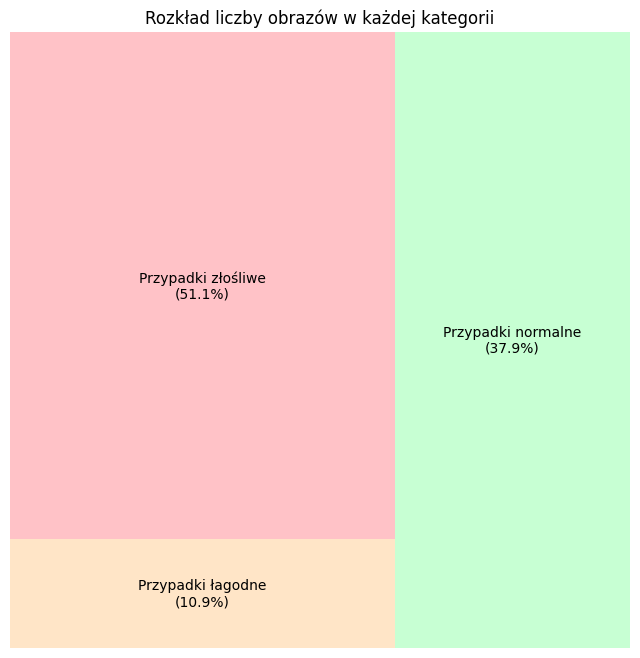

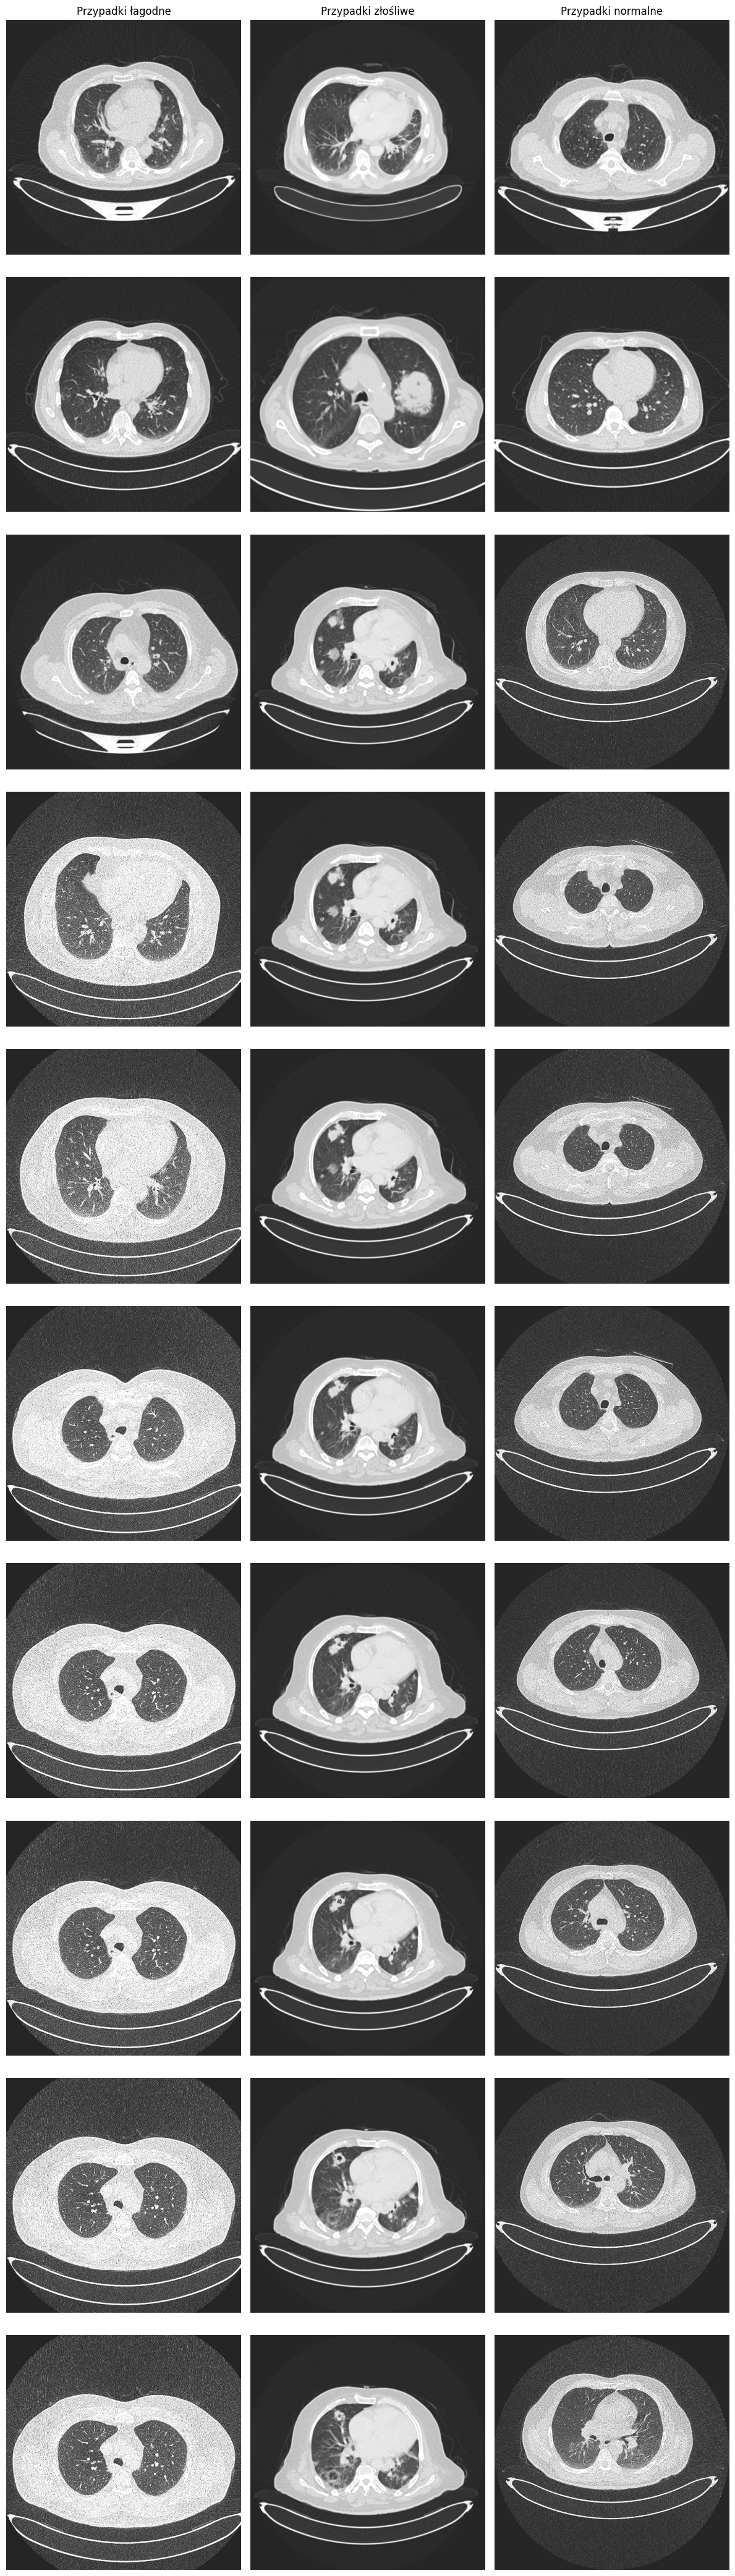

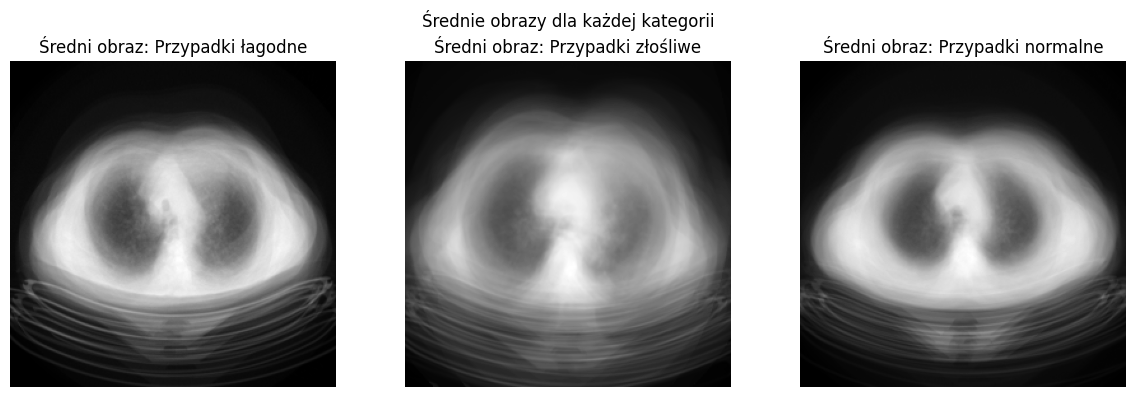

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import squarify
import pandas as pd
import cv2
# 0. Deklaracje
CATEGORY_PATHS = {'Bengin cases': 'data\The IQ-OTHNCCD lung cancer dataset\Bengin cases', 
                  'Malignant cases': 'data\The IQ-OTHNCCD lung cancer dataset\Malignant cases',
                  'Normal cases': 'data\The IQ-OTHNCCD lung cancer dataset\\Normal cases'}
COLORS = {'red': '#ffb3ba', 'orange': '#ffdfba', 'green': '#baffc9'}
CATEGORY_TRANSLATION = {
    'Bengin cases': 'Przypadki łagodne',
    'Malignant cases': 'Przypadki złośliwe',
    'Normal cases': 'Przypadki normalne'
}

file_counts = {}
file_lists = {}
# 1. Zliczanie plików w każdej kategorii
for category, path in CATEGORY_PATHS.items():
    file_lists[category] = [file for file in os.listdir(path)]
    file_counts[category] = len(file_lists[category])
# 2. Wykres rozkładu danych
total_files_count = sum(file_counts.values())
labels = []
for category, file_count in file_counts.items():
    percentage = (file_count / total_files_count) * 100
    translated_category = CATEGORY_TRANSLATION.get(category, category)
    labels.append(f"{translated_category}\n({percentage:.1f}%)")
plt.figure(figsize=(8, 8))
squarify.plot(sizes=list(file_counts.values()), label=labels, color=[COLORS['orange'], COLORS['red'], COLORS['green']], alpha=.8)
plt.title('Rozkład liczby obrazów w każdej kategorii')
plt.axis('off')
plt.show()
# 3. Wyświetlenie pierwszego obrazu z każdej kategorii
num_images = 10
rows = num_images
cols = len(CATEGORY_PATHS)
plt.figure(figsize=(12, 42))
for col_idx, (category, path) in enumerate(CATEGORY_PATHS.items()):
    images = file_lists[category][:num_images]
    for row_idx, filename in enumerate(images):
        img_path = os.path.join(path, filename)
        img = Image.open(img_path)
        ax_idx = row_idx * cols + col_idx + 1
        plt.subplot(rows, cols, ax_idx)
        plt.imshow(img)
        if row_idx == 0:
            plt.title(CATEGORY_TRANSLATION.get(category, category), fontsize=12)
        plt.axis('off')
plt.tight_layout()
plt.show()
# 4. Tworzenie średnich obrazów
def compute_average_image_cv2(image_dir, image_list, size=(256, 256)):
    sum_image = np.zeros(size, dtype=np.float32)
    count = 0
    for filename in image_list:
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        try:
            img_resized = cv2.resize(img, size)
            sum_image += img_resized.astype(np.float32)
            count += 1
        except:
            print(f"Błąd przetwarzania {filename}")
    if count == 0:
        return np.zeros(size)
    avg_image = sum_image / count
    return avg_image

# Rysowanie średnich obrazów
plt.figure(figsize=(12, 4))
for i, (category, path) in enumerate(CATEGORY_PATHS.items()):
    avg_img = compute_average_image_cv2(path, file_lists[category])
    plt.subplot(1, 3, i + 1)
    plt.imshow(avg_img, cmap='gray')
    plt.title(f'Średni obraz: {CATEGORY_TRANSLATION.get(category, category)}')
    plt.axis('off')

plt.suptitle('Średnie obrazy dla każdej kategorii')
plt.tight_layout()
plt.show()


### LUNA16
**Pochodzenie:**  
https://www.kaggle.com/datasets/avc0706/luna16?select=evaluationScript  
https://paperswithcode.com/dataset/luna16  
Universal Lesion Detection by Learning from Multiple Heterogeneously Labeled Datasets  
Autorzy: Ke Yan, Jinzheng Cai, Adam P. Harrison, Dakai Jin, Jing Xiao, Le Lu
**Licencja**  
CC BY 4.0

**Artykuły:**  
- Naseer, Iftikhar, et al. "Lung cancer classification using modified u-net based lobe segmentation and nodule detection." IEEE Access 11 (2023): 60279-60291.  
*Metrics: Acc: 97.98 Sen: 98.84  Spe: 97.47 Pre: 97.53 F1 score: 97.70 ; Imaging: CT scans ; Methods: Modified U-Net + modified AlexNet*

- Saleh, Abdulrazak Yahya, Chee Ka Chin, and Ros Ameera Rosdi. "Transfer Learning for Lung Nodules Classification with CNN and Random Forest." Pertanika Journal of Science & Technology 32.1 (2024).  
*Metrics: AAcc: 98.53 Sen: 98.74  Spe: 98.32 F1 score: 98.54 AUC: 0.985 ; Imaging: CT scans ; Methods: Hybrid CNN with transfer learning and random forest*

- Saha, Anindita, et al. "VER-Net: a hybrid transfer learning model for lung cancer detection using CT scan images." BMC medical imaging 24.1 (2024): 120.  
*Metrics: Acc 99.2 Sens 98.8 Spe 99.6 ; Imaging: CT scans ; Methods: 3D-ResNet Model*

Rozmiar danych (slices, H, W): (121, 512, 512)
Rozdzielczość voxela (mm): (0.7617189884185791, 0.7617189884185791, 2.5)
Punkt początkowy: (-198.100006, -195.0, -335.209991)


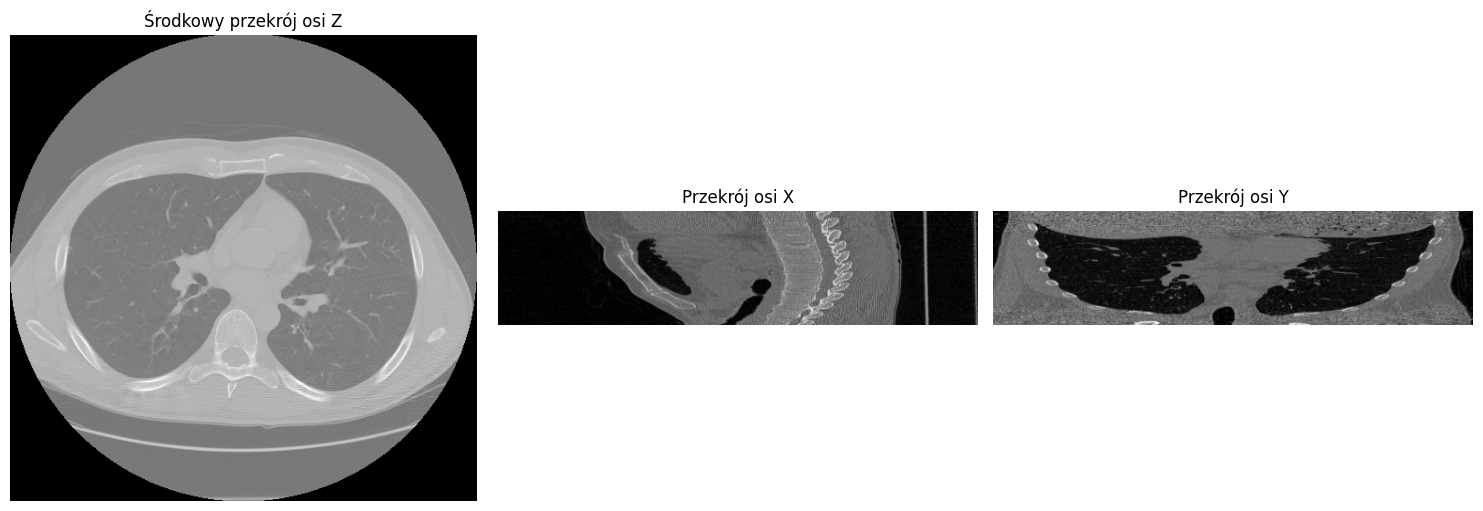

Dostępne kolumny:
Index(['seriesuid', 'coordX', 'coordY', 'coordZ', 'diameter_mm'], dtype='object')
Rozkład klas:
class
1    1186
Name: count, dtype: int64


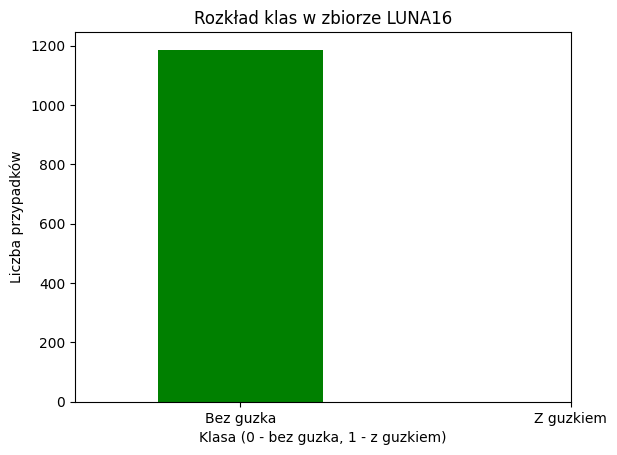

In [12]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Ścieżka do pliku .mhd
mhd_path = 'data/luna16/subset0/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd'

# Wczytaj dane
image = sitk.ReadImage(mhd_path)
image_array = sitk.GetArrayFromImage(image)  # [slices, height, width]
spacing = image.GetSpacing()                # voxel spacing
origin = image.GetOrigin()                  # physical origin

# Informacje diagnostyczne
print(f"Rozmiar danych (slices, H, W): {image_array.shape}")
print(f"Rozdzielczość voxela (mm): {spacing}")
print(f"Punkt początkowy: {origin}")

# Wybierz przykładowy przekrój
mid = image_array.shape[0] // 2

# Wyświetlenie 3 przekrojów z wolumenu
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image_array[mid], cmap='gray')
axs[0].set_title("Środkowy przekrój osi Z")

axs[1].imshow(image_array[:, :, image_array.shape[2] // 2], cmap='gray')
axs[1].set_title("Przekrój osi X")

axs[2].imshow(image_array[:, image_array.shape[1] // 2, :], cmap='gray')
axs[2].set_title("Przekrój osi Y")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Załaduj plik CSV z informacjami o guzach
csv_path = 'data/luna16/evaluationScript/evaluationScript/annotations/annotations.csv'  # ← Zmodyfikuj ścieżkę do pliku CSV
df = pd.read_csv(csv_path)

# Sprawdź dostępne kolumny
print("Dostępne kolumny:")
print(df.columns)

# Dodaj nową kolumnę 'class', gdzie 1 = z guzkiem, 0 = bez guzka
df['class'] = df['diameter_mm'].apply(lambda x: 1 if x > 0 else 0)

# Oblicz rozkład klas
class_distribution = df['class'].value_counts()

# Wydrukuj rozkład
print("Rozkład klas:")
print(class_distribution)

# Wykres
class_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Rozkład klas w zbiorze LUNA16')
plt.xlabel('Klasa (0 - bez guzka, 1 - z guzkiem)')
plt.ylabel('Liczba przypadków')
plt.xticks(ticks=[0, 1], labels=['Bez guzka', 'Z guzkiem'], rotation=0)
plt.show()



### LIDC-IDRI
**Pochodzenie:**  
https://www.kaggle.com/datasets/zhangweiled/lidcidri?resource=download  
https://www.cancerimagingarchive.net/collection/lidc-idri/

**Licencja**  
Cytowanie danych
Armato III, SG, McLennan, G., Bidaut, L., McNitt-Gray, MF, Meyer, CR, Reeves, AP, Zhao, B., Aberle, DR, Henschke, CI, Hoffman, EA, Kazerooni, EA, MacMahon, H., Van Beek, EJR, Yankelevitz, D., Biancardi, AM, Bland, PH, Brown, MS, Engelmann, RM, Laderach, GE, Max, D., Pais, RC , Qing, DPY , Roberts, RY, Smith, AR, Starkey, A., Batra, P., Caligiuri, P., Farooqi, A., Gladish, GW, Jude, CM, Munden, RF, Petkovska, I., Quint, LE, Schwartz, LH, Sundaram, B., Dodd, LE, Fenimore, C., Gur, D., Petrick, N., Freymann, J., Kirby, J., Hughes, B., Casteele, AV, Gupte, S., Sallam, M., Heath, MD, Kuhn, MH, Dharaiya, E., Burns, R., Fryd, DS, Salganicoff, M., Anand, V., Shreter, U., Vastagh, S., Croft, BY,  Clarke, LP (2015). Dane z LIDC-IDRI [zestaw danych]. Archiwum obrazowania raka. https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX

Potwierdzenie
Prosimy pamiętać o uwzględnieniu w publikacjach i wnioskach o dotacje następującego przypisu wraz z odniesieniami do odpowiednich publikacji LIDC:

„Autorzy pragną podziękować Narodowemu Instytutowi Raka i Fundacji Narodowych Instytutów Zdrowia oraz ich kluczowej roli w stworzeniu bezpłatnej, publicznie dostępnej bazy danych LIDC/IDRI wykorzystanej w tym badaniu”.

**Artykuły:**  
- Betti, Ghufran Abbas, et al. "Lung Cancer classification using an ensemble of CNNs Method in CT Scan Images." Journal of Education for Pure Science-University of Thi-Qar 14.2 (2024).  
*Metrics: Acc: 98 Sen: 99.15  Spe: 97.06 ; Imaging: CT scans ; Methods: Ensemble of CNNs*

- Gondkar, Raju Ramakrishna, Sureka R. Gondkar, and Siva Balan RV. "Hybrid Deep Learning Based GRU Model for Classifying the Lung Cancer from CT Scan Images." 2024 Third International Conference on Distributed Computing and Electrical Circuits and Electronics (ICDCECE). IEEE, 2024.  
*Metrics: Acc: 95 Sen: 99.14  Spe: 90 ; Imaging: CT scans ; Methods: KL+1D CNN+GRU*

- Li, Dana, et al. "The performance of deep learning algorithms on automatic pulmonary nodule detection and classification tested on different datasets that are not derived from LIDC-IDRI: a systematic review." Diagnostics 9.4 (2019): 207.
*Metrics: clasification acc: 68–99.6%, detection acc: 80.6–94%; Imaging: CT scans ; Methods: Three different deep learning architectures were mentioned amongst the included studies: convolutional neural network (CNN), massive training artificial neural network (MTANN), and deep stacked denoising autoencoder extreme learning machine (SDAE-ELM)*